In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from astropy.convolution import convolve, Gaussian1DKernel
from scipy.optimize import curve_fit
from scipy import stats
from astropy.modeling import models, fitting
from scipy import spatial

In [2]:
location = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_pyramidal/responseprofilewithlocation.csv', delimiter = ',', dtype = 'str')
location2 = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_interneuron/responseprofilewithlocation.csv', delimiter = ',', dtype = str)

location = np.vstack((location, location2))
aplocation = np.array(location[:,-4], np.float)
dvlocation = np.array(location[:,-1], np.float)

In [3]:
femaleap = aplocation[location[:,4] == 'female']
femaledv = dvlocation[location[:,4] == 'female']

maleap = aplocation[location[:,4] == 'male']
maledv = dvlocation[location[:,4] == 'male']

objectap = aplocation[location[:,4] == 'object']
objectdv = dvlocation[location[:,4] == 'object']

foodap = aplocation[location[:,4] == 'food']
fooddv = dvlocation[location[:,4] == 'food']

panresponsiveap = aplocation[location[:,4] == 'panresponsive']
panresponsivedv = dvlocation[location[:,4] == 'panresponsive']

socialap = np.hstack((aplocation[location[:,4] == 'social'], aplocation[location[:,4] == 'male'], aplocation[location[:,4] == 'female']))
socialdv = np.hstack((dvlocation[location[:,4] == 'social'], dvlocation[location[:,4] == 'male'], dvlocation[location[:,4] == 'female']))

nonsocialap = np.hstack((aplocation[location[:,4] == 'nonsocial'], aplocation[location[:,4] == 'food'], aplocation[location[:,4] == 'object']))
nonsocialdv = np.hstack((dvlocation[location[:,4] == 'nonsocial'], dvlocation[location[:,4] == 'food'], dvlocation[location[:,4] == 'object']))

In [4]:
maledvhist = np.histogram(maledv, bins = np.arange(7500, 10250, 250), density = True)[0]
femaledvhist = np.histogram(femaledv, bins = np.arange(7500, 10250, 250), density = True)[0]
objdvhist = np.histogram(objectdv, bins = np.arange(7500, 10250, 250), density = True)[0]
fooddvhist = np.histogram(fooddv, bins = np.arange(7500, 10250, 250), density = True)[0]

histbins = np.histogram(maledv, bins = np.arange(7500, 10250, 250), density = True)[1]

maleaphist = np.histogram(maleap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
femaleaphist = np.histogram(femaleap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
objaphist = np.histogram(objectap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
foodaphist = np.histogram(foodap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]

histbins2 = np.histogram(maleap, bins = np.arange(-4, -1.75, 0.25), density = True)[1]

panaphist = np.histogram(panresponsiveap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
pandvhist = np.histogram(panresponsivedv, bins = np.arange(7500, 10250, 250), density = True)[0]

socialaphist = np.histogram(socialap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
socialdvhist = np.histogram(socialdv, bins = np.arange(7500, 10250, 250), density = True)[0]

nonsocialaphist = np.histogram(nonsocialap, bins = np.arange(-4, -1.75, 0.25), density = True)[0]
nonsocialdvhist = np.histogram(nonsocialdv, bins = np.arange(7500, 10250, 250), density = True)[0]

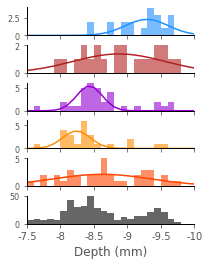

In [6]:
plt.close()

fig, ax = plt.subplots(6, figsize = (3, 4), sharex = True)


ax[0].hist(maledv, bins = np.arange(7500, 10250, 100), color = 'dodgerblue', alpha = 0.6)
malex = np.arange(7500, 10250, 100)[:-1]
maley = np.histogram(maledv, bins = np.arange(7500, 10250, 100))[0]
g_male = models.Gaussian1D(amplitude=np.max(maley), mean = np.mean(maledv), stddev = np.std(maledv))
fit_male = fitting.LevMarLSQFitter()
g_male = fit_male(g_male, malex, maley)
ax[0].plot(malex, g_male(malex), color = 'dodgerblue')

ax[0].grid(False)
ax[1].hist(femaledv, bins = np.arange(7500, 10250, 100), color = 'firebrick', alpha = 0.6)
femalex = np.arange(7500, 10250, 100)[:-1]
femaley = np.histogram(femaledv, bins = np.arange(7500, 10250, 100))[0]
g_female=models.Gaussian1D(amplitude=np.max(femaley), mean = np.mean(femaledv), stddev = np.std(femaledv))
fit_female = fitting.LevMarLSQFitter()
g_female = fit_female(g_female, femalex, femaley)
ax[1].plot(femalex, g_female(femalex), color = 'firebrick')
ax[1].grid(False)


ax[2].hist(objectdv, bins = np.arange(7500, 10250, 100), color = 'darkviolet', alpha = 0.6)
ax[2].grid(False)
objx = np.arange(7500, 10250, 100)[:-1]
objy = np.histogram(objectdv, bins = np.arange(7500, 10250, 100))[0]
g_obj = models.Gaussian1D(amplitude=np.max(objy), mean=np.mean(objectdv), stddev = np.std(objectdv))
fit_obj = fitting.LevMarLSQFitter()
g_obj = fit_obj(g_obj, objx, objy)
c = ax[2].plot(objx, g_obj(objx), color = 'darkviolet')

ax[3].hist(fooddv, bins = np.arange(7500, 10250, 100), color = 'darkorange', alpha = 0.6)
foodx = np.arange(7500, 10250, 100)[:-1]
foody = np.histogram(fooddv, bins = np.arange(7500, 10250, 100))[0]
g_food = models.Gaussian1D(amplitude=np.max(foody), mean = np.mean(fooddv), stddev = np.std(fooddv))
fit_food = fitting.LevMarLSQFitter()
g_food = fit_food(g_food, foodx, foody)
d = ax[3].plot(foodx, g_food(foodx), color = 'darkorange')
ax[3].grid(False)

ax[4].hist(panresponsivedv, bins = np.arange(7500, 10250, 100), color = 'orangered', alpha = 0.6)
panx = np.arange(7500, 10250, 100)[:-1]
pany = np.histogram(panresponsivedv, bins = np.arange(7500, 10250, 100))[0]
g_pan = models.Gaussian1D(amplitude=np.max(pany), mean = np.mean(panresponsivedv), stddev = np.std(panresponsivedv))
fit_pan = fitting.LevMarLSQFitter()
g_pan = fit_pan(g_pan, panx, pany)
e = ax[4].plot(panx, g_pan(panx), color = 'orangered')
ax[4].grid(False)

f = ax[5].hist(dvlocation, bins = np.arange(7500, 10250, 100), color = 'black', alpha = 0.6)
x = np.arange(7500, 10250, 100)[:-1]
y = np.histogram(dvlocation, bins = np.arange(7500, 10250, 100))[0]
g = models.Gaussian1D(amplitude=np.max(y), mean = np.mean(dvlocation), stddev = np.std(dvlocation))
fit = fitting.LevMarLSQFitter()
g = fit(g, x, y)
#ax[5].plot(x, g(x), color = 'black')
ax[5].grid(False)
ax[5].set_xlim(7500, 10000)
ax[5].set_xticklabels((-7.5, -8, -8.5, -9, -9.5, -10))
ax[5].set_xlabel('Depth (mm)', fontsize = 12)
ax[5].set_yticklabels((0,50),fontsize = 8)
ax[4].set_yticklabels((0,5), fontsize = 8)
ax[3].set_yticklabels((0,5), fontsize = 8)
ax[2].set_yticklabels((0,5), fontsize = 8)
ax[1].set_yticklabels((0,2), fontsize = 8)
ax[0].set_yticklabels((0,2.5), fontsize = 8)

#ax[0].set_title('Male', fontsize = 10)
#ax[1].set_title('Female', fontsize = 10)
#ax[2].set_title('Toy', fontsize = 10)
#ax[3].set_title('Food', fontsize = 10)
#ax[4].set_title('Panresponsive', fontsize = 10)
#ax[5].set_title('All Neurons', fontsize = 10)
plt.subplots_adjust(hspace = .3)

ax[0].spines['left'].set_color('k')
ax[0].spines['bottom'].set_color('k')
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('k')
ax[2].spines['left'].set_color('k')
ax[2].spines['bottom'].set_color('k')
ax[3].spines['left'].set_color('k')
ax[3].spines['bottom'].set_color('k')
ax[4].spines['left'].set_color('k')
ax[4].spines['bottom'].set_color('k')
ax[5].spines['left'].set_color('k')
ax[5].spines['bottom'].set_color('k')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[2].set_facecolor('white')
ax[3].set_facecolor('white')
ax[4].set_facecolor('white')
ax[5].set_facecolor('white')
plt.rcParams['svg.fonttype'] = 'none'

plt.savefig('F:/Figure2/F2_Neurons_DVaxis.svg', format = 'svg', dpi = 500, transparent=True)

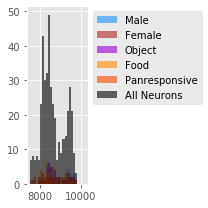

In [7]:
fig, ax = plt.subplots(1, figsize = (3,3))

ax.hist(maledv, bins = np.arange(7500, 10250, 100), color = 'dodgerblue', alpha = 0.6)
ax.hist(femaledv, bins = np.arange(7500, 10250, 100), color = 'firebrick', alpha = 0.6)
ax.hist(objectdv, bins = np.arange(7500, 10250, 100), color = 'darkviolet', alpha = 0.6)
ax.hist(fooddv, bins = np.arange(7500, 10250, 100), color = 'darkorange', alpha = 0.6)
ax.hist(panresponsivedv, bins = np.arange(7500, 10250, 100), color = 'orangered', alpha = 0.6)
ax.hist(dvlocation, bins = np.arange(7500, 10250, 100), color = 'black', alpha = 0.6)

plt.legend(('Male', 'Female', 'Object', 'Food', 'Panresponsive', 'All Neurons'), bbox_to_anchor = (1,1))

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'

plt.savefig('F:/Figure2/F2_Neurons_DVaxis_legend.svg', format = 'svg', dpi = 500, transparent=True)

In [8]:
pdists_male = spatial.distance.pdist(maledv.reshape(len(maledv), 1))
pdists_female = spatial.distance.pdist(femaledv.reshape(len(femaledv), 1))
pdists_obj = spatial.distance.pdist(objectdv.reshape(len(objectdv), 1))
pdists_food = spatial.distance.pdist(fooddv.reshape(len(fooddv), 1))
pdists_pan = spatial.distance.pdist(panresponsivedv.reshape(len(panresponsivedv), 1))
pdists_all = spatial.distance.pdist(dvlocation.reshape(len(dvlocation), 1))

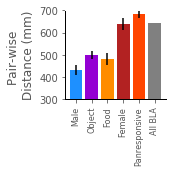

In [12]:
fig, ax = plt.subplots(1, figsize = (2.5,2.5))

ax.bar((0,1,2,3,4,5), (np.mean(pdists_male), np.mean(pdists_obj), np.mean(pdists_food), np.mean(pdists_female), np.mean(pdists_pan), np.mean(pdists_all)), 
          yerr = (stats.sem(pdists_male), stats.sem(pdists_obj), stats.sem(pdists_food), stats.sem(pdists_female), stats.sem(pdists_pan), stats.sem(pdists_all)), color = ('dodgerblue', 'darkviolet', 'darkorange', 'firebrick', 'orangered', 'grey'))
#ax[1].boxplot((pdists_male, pdists_obj, pdists_food, pdists_female, pdists_pan, pdists_all), showcaps = False, showfliers = False)
ax.grid(False)
ax.set_xticks((0,1,2,3,4,5))
ax.set_xticklabels(('Male', 'Object', 'Food', 'Female', 'Panresponsive', 'All BLA'), rotation = 90, fontsize = 8)
ax.set_ylabel('Pair-wise \nDistance (mm)')
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.set_ylim(300,700)

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure2/F2_pairwisedistances.svg', format = 'svg', dpi = 500, transparent = True)
#plt.savefig('F:/FigurePlots/pairwisedistance.png', dpi = 300)

In [19]:
for i, ii in enumerate(pdists_all):
    print(ii)

940.0
940.0
940.0
940.0
200.0
260.0
920.0
920.0
920.0
360.0
900.0
900.0
880.0
800.0
860.0
800.0
800.0
800.0
800.0
800.0
800.0
780.0
760.0
760.0
760.0
1020.0
1020.0
1020.0
720.0
720.0
720.0
720.0
720.0
700.0
680.0
680.0
640.0
640.0
620.0
620.0
600.0
580.0
1000.0
520.0
460.0
1000.0
1000.0
400.0
400.0
400.0
360.0
980.0
980.0
980.0
160.0
140.0
960.0
240.0
240.0
220.0
200.0
180.0
120.0
120.0
100.0
100.0
100.0
80.0
80.0
40.0
20.0
0.0
20.0
20.0
20.0
20.0
40.0
40.0
1120.0
60.0
60.0
60.0
80.0
80.0
80.0
100.0
120.0
140.0
140.0
220.0
220.0
1100.0
1100.0
380.0
400.0
420.0
420.0
440.0
440.0
1080.0
460.0
460.0
460.0
460.0
1080.0
1060.0
1060.0
1060.0
1040.0
1040.0
1040.0
1020.0
1020.0
1020.0
1000.0
980.0
960.0
1220.0
940.0
940.0
940.0
940.0
900.0
900.0
900.0
900.0
900.0
860.0
860.0
860.0
860.0
840.0
840.0
840.0
840.0
820.0
820.0
820.0
800.0
800.0
780.0
760.0
1200.0
740.0
720.0
660.0
640.0
620.0
600.0
600.0
580.0
540.0
540.0
540.0
460.0
460.0
440.0
420.0
380.0
340.0
320.0
280.0
280.0
1010.0
1010.0
105

In [29]:
dvlocation.shape

(426,)